<a href="https://colab.research.google.com/github/jc533/ML_practices/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# regression
output scalar
- linear regression


In [ ]:
# without pytorch

In [ ]:
# pytorch
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset

In [ ]:
# self written dataset
def f(x):
    return x*3+20;
class MyDataset(Dataset):
    def __init__(self,size=100):
        x = np.random.rand(size)*100
        self.x = torch.from_numpy(x)
        self.y = torch.from_numpy(f(x)+np.random.rand(size)*10-np.random.rand(size)*10)
        # self.data = torch.from_numpy(np.array([x,y]))
    def __getitem__(self,index):
        return torch.tensor([self.x[index]]),torch.tensor([self.y[index]])
    def __len__(self):
        return len(self.x)

In [ ]:
# regression dataset


```
pytorch dataset structure
hole: [
    batch:[data: [data]]
]
```
**learning rate too big might lead to loss inf**

In [ ]:
# model
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.net = nn.Linear(1,1)
    def forward(self, x):
        return self.net(x)

In [ ]:
# dataloader
train,test = MyDataset(),MyDataset()
train_loader = DataLoader(train, batch_size=1, shuffle=True)
test_loader = DataLoader(test, batch_size=1, shuffle=False)

In [ ]:
model = Model()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),1e-4)
epochs = 5000
loss_record = []
model.double()
for epoch in range(epochs):
    model.train()
    for x,y in train_loader:
        optimizer.zero_grad()
        pred = model(x)
        loss = criterion(pred,y)
        # print(loss.item())
        loss_record.append(loss.item())
        loss.backward()
        optimizer.step()
print(np.mean(loss_record))

33.042985475732436


In [ ]:
model.eval()
preds = []
loss_test = []
for x,y in test_loader:
    with torch.no_grad():
        p = model(x)
        preds.append(p.item())
        loss_test.append(criterion(p,y))
print(np.mean(loss_test))

21.0384793727677


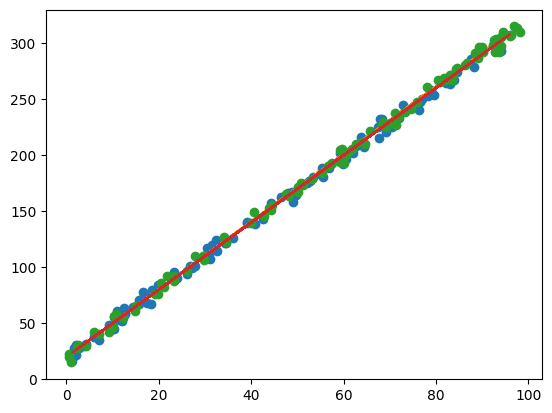

In [ ]:
import matplotlib.pyplot as plt
x = [i.item() for i in test.x]
y = [i.item() for i in test.y]
y_tr = [i.item() for i in train.y]
x_tr = [i.item() for i in train.x]
real = [f(i) for i in x]
plt.plot(x,y,'o')
# plt.xlim(0,1)
# plt.ylim(0,30)
plt.plot(x,preds,'-')
plt.plot(x_tr,y_tr,'o')
plt .plot(x,real)